# RFET: Risk Factor Eligibility Test

Check FRTB RFET details to identified criteria for a Risk Factor to be elegible to be used under IMA (Internal Model Approach)

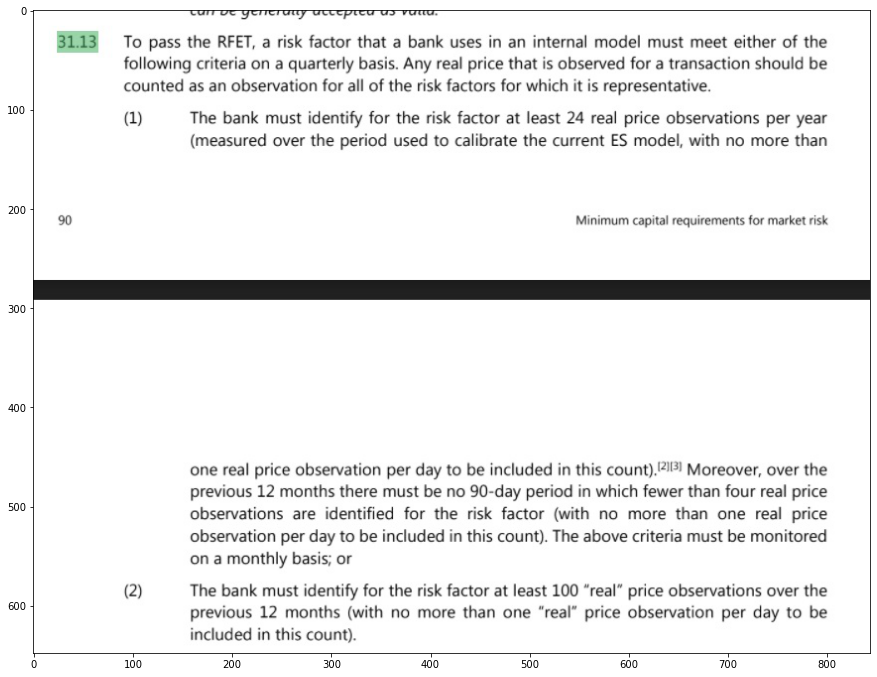

In [9]:
# Read image file using matplotlib to see paragraphs 31.13 from FRTB Full text regarding RFET

# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Read Images
img = mpimg.imread('FRTB_RFET.jpg')

# Output Images
plt.figure(figsize = [15, 20] )
plt.imshow(img)


RFET 31.13

A) Option A
    
    * 1 RPO per day; and,
    
    * 24 RPO in the last 12 months; and,
    
    * over the last 12 months: no 90-days period with less than 4 RPO

B) Option B
    
    * 1 RPO per day; and,
    
    * 100 RPO in the last 12 months

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
# customize date format for the one use in the csv: DD/MM/YYYY
date_ddmmyyyy = lambda x: datetime.strptime(x, "%d/%m/%Y")

In [4]:
# re-read csv to import Date column with date format & na_filter activated
# CHECK DATE FORMAT READ USED
rf_rpo = pd.read_csv( 'RFET.csv', na_filter = True, parse_dates = [ 'Date' ], date_parser=date_ddmmyyyy )

rf_rpo

,Date,Risk Factor,RPO
0,2018-11-23,ABC123.US,28.558348
1,2018-11-26,ABC123.US,64.398330
2,2018-11-27,ABC123.US,79.510427
3,2018-11-28,ABC123.US,30.954484
4,2018-11-29,ABC123.US,8.289524
...,...,...,...
745,2019-11-14,DEF456.US,52.413432
746,2019-11-15,DEF456.US,94.095267
747,2019-11-18,DEF456.US,84.021248
748,2019-11-19,DEF456.US,22.966057


In [5]:
# Validating the imported data
rf_rpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         750 non-null    datetime64[ns]
 1   Risk Factor  750 non-null    object        
 2   RPO          181 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 17.7+ KB


In [6]:
# check for columns with null values
rf_rpo.isnull().any()

Date           False
Risk Factor    False
RPO             True
dtype: bool

In [7]:
# removing rows with null RPO

rf_rpo = rf_rpo.dropna()
rf_rpo

,Date,Risk Factor,RPO
0,2018-11-23,ABC123.US,28.558348
1,2018-11-26,ABC123.US,64.398330
2,2018-11-27,ABC123.US,79.510427
3,2018-11-28,ABC123.US,30.954484
4,2018-11-29,ABC123.US,8.289524
...,...,...,...
745,2019-11-14,DEF456.US,52.413432
746,2019-11-15,DEF456.US,94.095267
747,2019-11-18,DEF456.US,84.021248
748,2019-11-19,DEF456.US,22.966057


In [8]:
rf_rpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 749
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         181 non-null    datetime64[ns]
 1   Risk Factor  181 non-null    object        
 2   RPO          181 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.7+ KB


In [9]:
# I will perform the RFET as of the max date of the entire dataset
start_date = start_date = max(rf_rpo['Date'])
start_date

Timestamp('2019-11-20 00:00:00')

In [10]:
# get list of RF
rf_list = rf_rpo['Risk Factor'].unique()
rf_list

array(['ABC123.US', 'DEF456.US', 'GHI789.US'], dtype=object)

In [11]:

print('Starte date is')
print(start_date)

# for simplicity, 365 days are used to calculate the 12 months period
_12months = pd.DateOffset(365)

# calculate begining date of the 12 month period
last_date = start_date - _12months
print('Last date is')
print(last_date)

# rpo_last12m = 

Starte date is
2019-11-20 00:00:00
Last date is
2018-11-20 00:00:00


In [12]:
# as 1 RPO per day is accepted, need to remove duplicated RPO for each RF
# Remove duplicates from Vol column

rf_rpo.drop_duplicates(inplace = True)
rf_rpo

<ipython-input-12-fad61eabca69>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_rpo.drop_duplicates(inplace = True)


,Date,Risk Factor,RPO
0,2018-11-23,ABC123.US,28.558348
1,2018-11-26,ABC123.US,64.398330
2,2018-11-27,ABC123.US,79.510427
3,2018-11-28,ABC123.US,30.954484
4,2018-11-29,ABC123.US,8.289524
...,...,...,...
745,2019-11-14,DEF456.US,52.413432
746,2019-11-15,DEF456.US,94.095267
747,2019-11-18,DEF456.US,84.021248
748,2019-11-19,DEF456.US,22.966057


In [33]:
# no duplicated RPOs were found

In [14]:
# create df for the Risk Factors, to assign the results later

RFET = pd.DataFrame({'Risk Factor': rf_list ,
                      'RFET': np.empty( [ len(rf_list) ], dtype=str ) })
RFET

,Risk Factor,RFET
0,ABC123.US,
1,DEF456.US,
2,GHI789.US,


In [15]:
# RFET for the every RF

In [16]:
# RFET: Option A

# RF = ABC123.US
risk_factor = rf_list[0]

print('RFET 24 RPO for', risk_factor)
rfet_b_minRPO = 100

# check if there are 24 RPO in the last 12 months
rfet_a_minRPO = 24

# RPO count
RPO_count = rf_rpo[ ( rf_rpo['Risk Factor'] == risk_factor ) &
        ( rf_rpo['Date'] <= start_date ) &
        ( rf_rpo['Date'] >= last_date ) ]['RPO'].count()

rfet_a_1 = (RPO_count >= rfet_a_minRPO)

rfet_a_1
# check if there is any 90days period with less than 4 RPO
rfet_a_2 = True
for i in range( 365 - 90  ):
    RPO_count_90d = rf_rpo[ ( rf_rpo['Risk Factor'] == risk_factor ) &
                                ( rf_rpo['Date'] <= start_date-pd.DateOffset(i) ) &
                                ( rf_rpo['Date'] >= start_date-pd.DateOffset(i)-pd.DateOffset(90) ) ]['RPO'].count()

#    rfet_a_2 = RPO_count_90d >= 4
    
    if RPO_count_90d < 4:
        rfet_a_2 = False
        break


rfet_a_2

rfet_a = (rfet_a_1 & rfet_a_2)
rfet_a

RFET 24 RPO for ABC123.US


False

In [17]:
# RFET: Option B

# RF = DEF456.US

risk_factor = rf_list[0]
print('RFET 100 RPO for', risk_factor)

rfet_b_minRPO = 100

RPO_count = rf_rpo[ ( rf_rpo['Risk Factor'] == risk_factor ) &
        ( rf_rpo['Date'] <= start_date ) &
        ( rf_rpo['Date'] >= last_date ) ]['RPO'].count()

rfet_b = (RPO_count >= rfet_b_minRPO)
rfet_b

RFET 100 RPO for ABC123.US


False

In [18]:
# RFET result
rfet_result = (rfet_a or rfet_b)

print('RFET for', risk_factor, 'is', rfet_result)

RFET for ABC123.US is False


In [19]:
if rfet_result == True:
    RFET.loc[ RFET['Risk Factor'] == risk_factor , ['RFET'] ]  = 'Pass'
             
elif rfet_result == False:
    RFET.loc[ RFET['Risk Factor'] == risk_factor , ['RFET'] ] = 'Fail'
             
else:
    print('Error')

In [20]:
RFET

,Risk Factor,RFET
0,ABC123.US,Fail
1,DEF456.US,
2,GHI789.US,


In [21]:
# RFET: Option A

# RF = DEF456.US

risk_factor = rf_list[1]

print('RFET 24 RPO for', risk_factor)
rfet_b_minRPO = 100

# check if there are 24 RPO in the last 12 months
rfet_a_minRPO = 24

# RPO count
RPO_count = rf_rpo[ ( rf_rpo['Risk Factor'] == risk_factor ) &
        ( rf_rpo['Date'] <= start_date ) &
        ( rf_rpo['Date'] >= last_date ) ]['RPO'].count()

rfet_a_1 = (RPO_count >= rfet_a_minRPO)

rfet_a_1
# check if there is any 90days period with less than 4 RPO
rfet_a_2 = True
for i in range( 365 - 90  ):
    RPO_count_90d = rf_rpo[ ( rf_rpo['Risk Factor'] == risk_factor ) &
                                ( rf_rpo['Date'] <= start_date-pd.DateOffset(i) ) &
                                ( rf_rpo['Date'] >= start_date-pd.DateOffset(i)-pd.DateOffset(90) ) ]['RPO'].count()

#    rfet_a_2 = RPO_count_90d >= 4
    
    if RPO_count_90d < 4:
        rfet_a_2 = False
        break


rfet_a_2

rfet_a = (rfet_a_1 or rfet_a_2)
rfet_a

RFET 24 RPO for DEF456.US


True

In [22]:
# RFET: Option B

# RF = DEF456.US

risk_factor = rf_list[1]
print('RFET 100 RPO for', risk_factor)
rfet_b_minRPO = 100

RPO_count = rf_rpo[ ( rf_rpo['Risk Factor'] == risk_factor ) &
        ( rf_rpo['Date'] <= start_date ) &
        ( rf_rpo['Date'] >= last_date ) ]['RPO'].count()

rfet_b = (RPO_count >= rfet_b_minRPO)
rfet_b

RFET 100 RPO for DEF456.US


True

In [23]:
# RFET result
rfet_result = (rfet_a or rfet_b)

print('RFET for', risk_factor, 'is', rfet_result)

RFET for DEF456.US is True


In [24]:
if rfet_result == True:
    RFET.loc[ RFET['Risk Factor'] == risk_factor , ['RFET'] ]  = 'Pass'
             
elif rfet_result == False:
    RFET.loc[ RFET['Risk Factor'] == risk_factor , ['RFET'] ] = 'Fail'
             
else:
    print('Error')

In [45]:
RFET

,Risk Factor,RFET
0,ABC123.US,Fail
1,DEF456.US,Pass
2,GHI789.US,


In [25]:
# RFET: Option A

# RF = GHI789.US

risk_factor = rf_list[2]

print('RFET 24 RPO for', risk_factor)
rfet_b_minRPO = 100

# check if there are 24 RPO in the last 12 months
rfet_a_minRPO = 24

# RPO count
RPO_count = rf_rpo[ ( rf_rpo['Risk Factor'] == risk_factor ) &
        ( rf_rpo['Date'] <= start_date ) &
        ( rf_rpo['Date'] >= last_date ) ]['RPO'].count()

rfet_a_1 = (RPO_count >= rfet_a_minRPO)

rfet_a_1
# check if there is any 90days period with less than 4 RPO
rfet_a_2 = True
for i in range( 365 - 90  ):
    RPO_count_90d = rf_rpo[ ( rf_rpo['Risk Factor'] == risk_factor ) &
                                ( rf_rpo['Date'] <= start_date-pd.DateOffset(i) ) &
                                ( rf_rpo['Date'] >= start_date-pd.DateOffset(i)-pd.DateOffset(90) ) ]['RPO'].count()

#    rfet_a_2 = RPO_count_90d >= 4
    
    if RPO_count_90d < 4:
        rfet_a_2 = False
        break


rfet_a_2

rfet_a = (rfet_a_1 & rfet_a_2)
rfet_a

RFET 24 RPO for GHI789.US


False

In [26]:
# RFET: Option B

# RF = GHI789.US

risk_factor = rf_list[2]
print('RFET 100 RPO for', risk_factor)
rfet_b_minRPO = 100

RPO_count = rf_rpo[ ( rf_rpo['Risk Factor'] == risk_factor ) &
        ( rf_rpo['Date'] <= start_date ) &
        ( rf_rpo['Date'] >= last_date ) ]['RPO'].count()

rfet_b = (RPO_count >= rfet_b_minRPO)
rfet_b

RFET 100 RPO for GHI789.US


False

In [27]:
# RFET result
rfet_result = (rfet_a & rfet_b)

print('RFET for', risk_factor, 'is', rfet_result)

RFET for GHI789.US is False


In [28]:
if rfet_result == True:
    RFET.loc[ RFET['Risk Factor'] == risk_factor , ['RFET'] ]  = 'Pass'
             
elif rfet_result == False:
    RFET.loc[ RFET['Risk Factor'] == risk_factor , ['RFET'] ] = 'Fail'
             
else:
    print('Error')

In [29]:
RFET

,Risk Factor,RFET
0,ABC123.US,Fail
1,DEF456.US,Pass
2,GHI789.US,Fail
